# Personal Loan Campaign

## Problem Statement

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

Objectives:
- To predict whether a liability customer will buy a personal loan or not.
- Which variables are most significant.
- Which segment of customers should be targeted more.

## Data Dictionary

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
df = pd.read_csv("Loan_Modelling.csv")

In [3]:
df.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(5000, 14)

In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
# Checking the data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- Having -3 as years of experience is unrealistic. This will be further inspected in the cell below.

In [9]:
df[df["Experience"] < 0]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [10]:
# Checking the number of customers with
df[df["Experience"] < 0].shape[0]

52

- From the two cells above, it's evident that 52 customers were affected. We will assume that the negative sign was a mistake and would be removed in the following cell.

In [11]:
# Removing the negative sign
df["Experience"] = df["Experience"].abs()

In [12]:
# Sanity check
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<Figure size 768x576 with 0 Axes>

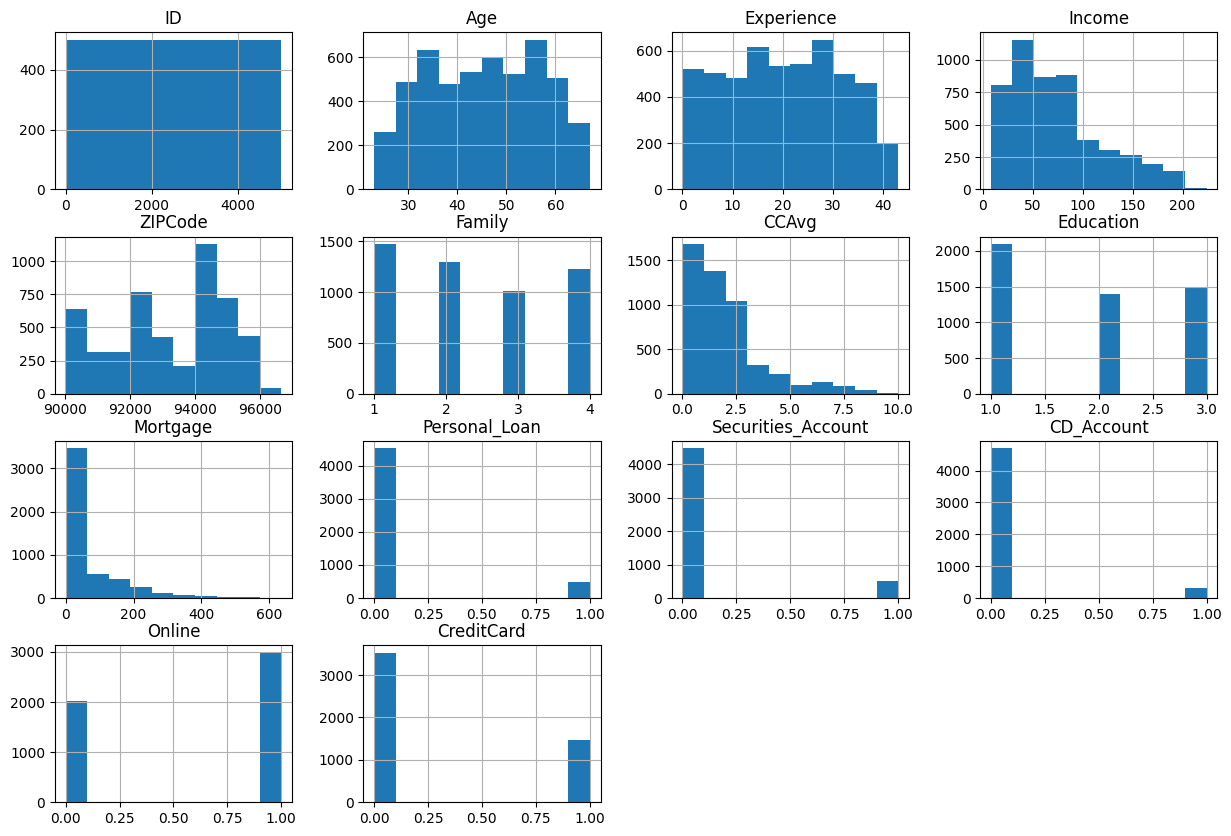

In [13]:
# Checking the data distribution
plt.figure(dpi = 120);
df.hist(figsize = (15, 10));
plt.show();

- The variables Mortgage, Income, and CCAvg exhibit a right-skewed distribution and require further investigation. The plots also indicate an imbalance in the data.

### Outlier Detection

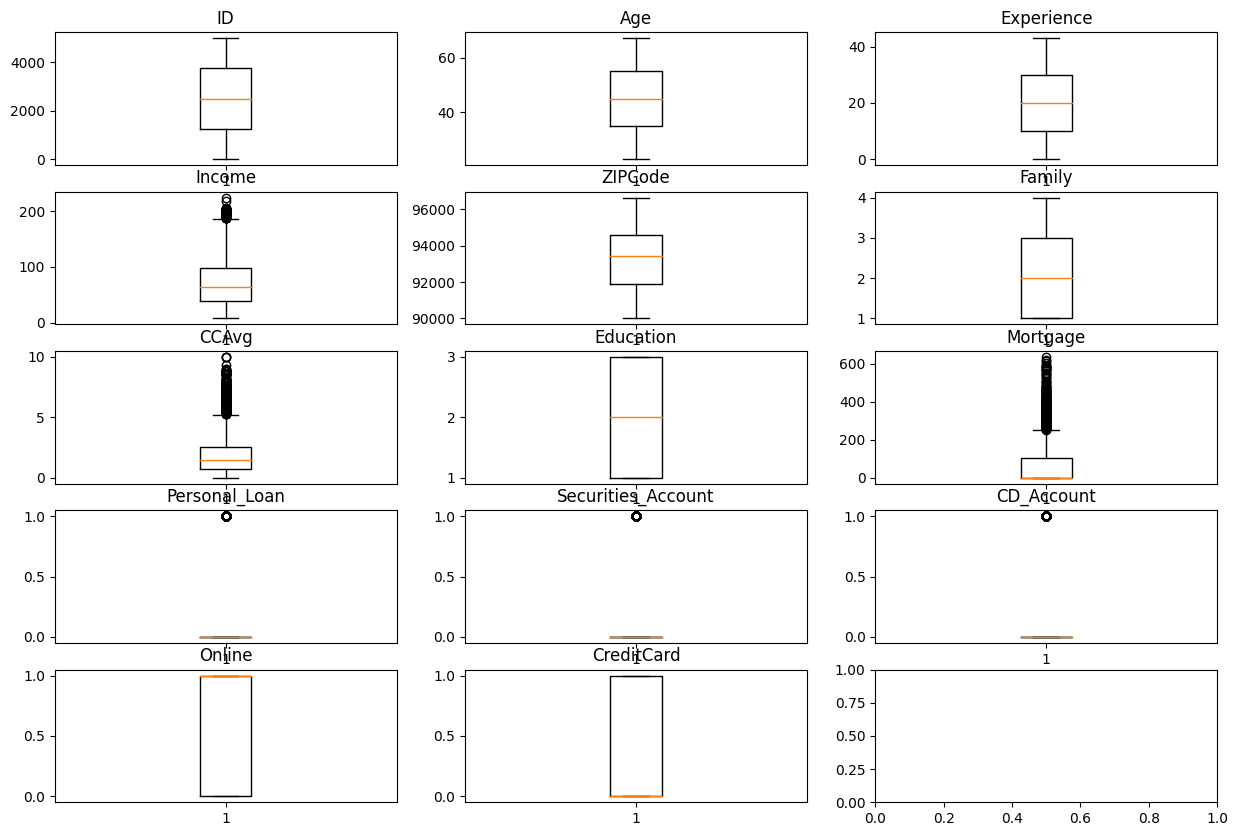

In [14]:
# create subplots for the numerical columns
num_cols = ['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard']
fig, axs = plt.subplots(5, 3, figsize=(15, 10))
for i, col in enumerate(num_cols):
    row = i // 3
    pos = i % 3
    axs[row, pos].boxplot(df[col])
    axs[row, pos].set_title(col)
plt.show()

- The boxplots provide clear evidence that the right skewness observed in the variables Mortgage, Income, and CCAvg is attributable to the presence of outliers.

### Treating Outliers

In [15]:
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25) # 25th quantile
    Q3 = df[col].quantile(0.75) # 75th quantile
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)
    return df

def treat_outliers_all(df, col_List):
    for c in col_List:
        df = treat_outliers(df, c)
    return df

In [16]:
df = treat_outliers_all(df, ["Income", "Mortgage", "CCAvg"])

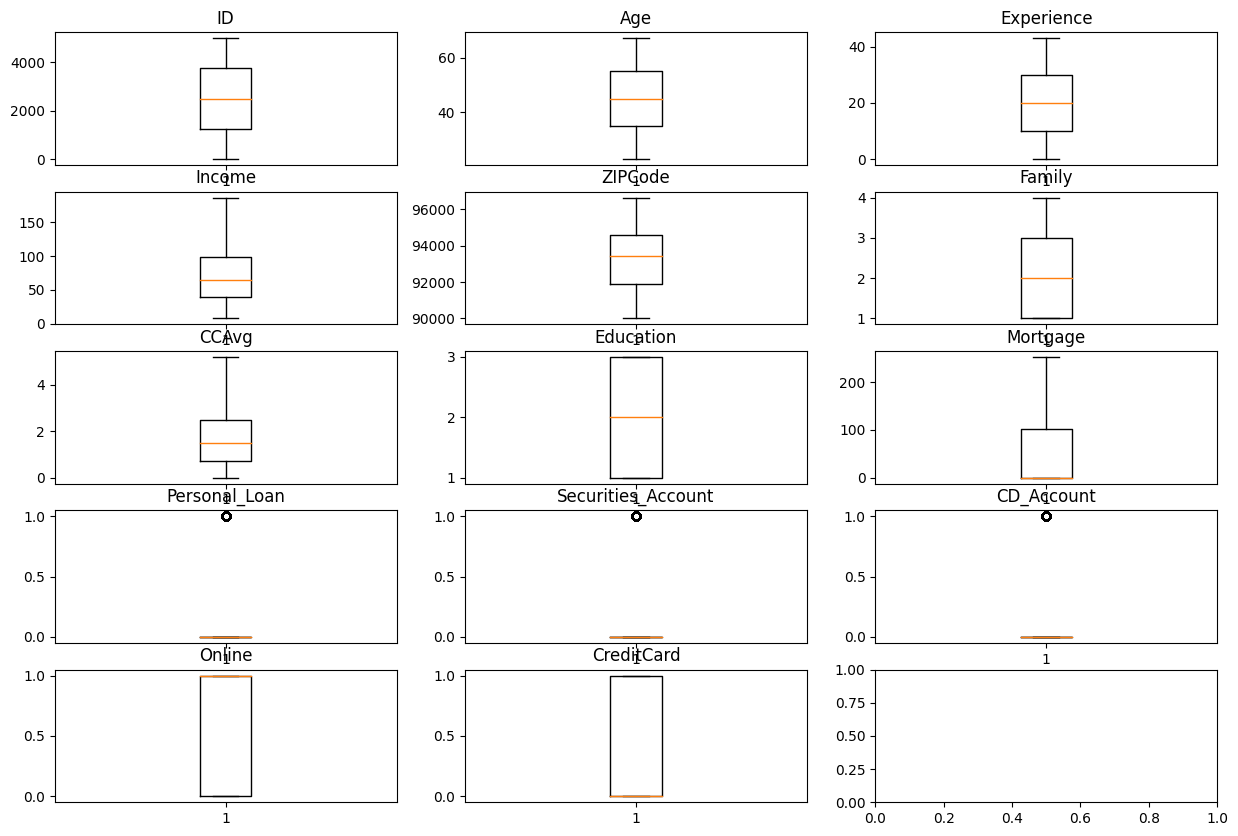

In [17]:
# Sanity check
# create subplots for the numerical columns
num_cols = ['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard']
fig, axs = plt.subplots(5, 3, figsize=(15, 10))
for i, col in enumerate(num_cols):
    row = i // 3
    pos = i % 3
    axs[row, pos].boxplot(df[col])
    axs[row, pos].set_title(col)
plt.show()

- It's evident that the outliers have now been treated.

### Checking for correlation between the variables

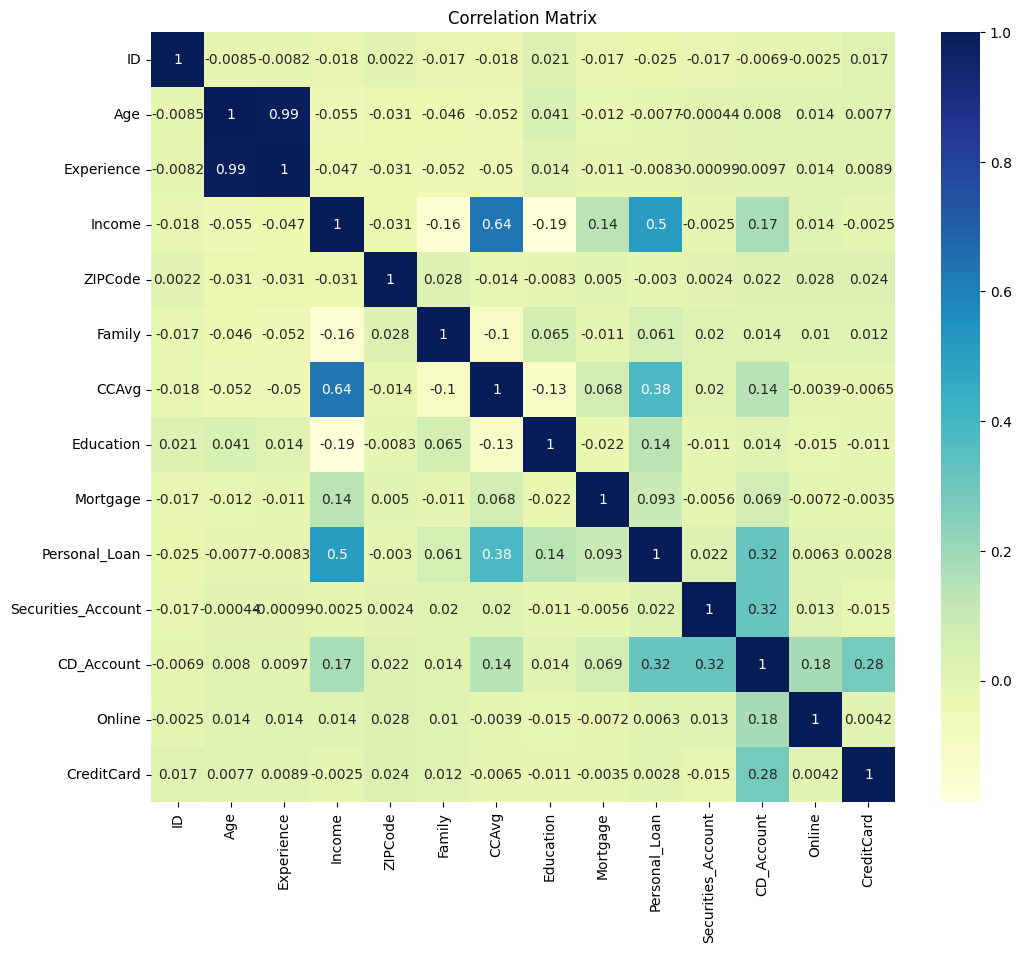

In [18]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

- From the plot above, it is evident that only Income, CCAvg, and CD_Account exhibit a moderate correlation with the target variable (Personal_Loan). The remaining variables display a combination of negative correlation and weak positive correlation.

## Univariate Analysis

In [19]:
import util

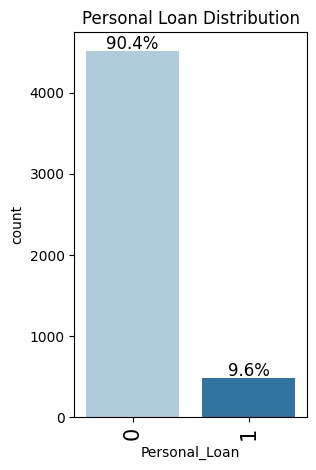

In [20]:
util.labeled_barplot(data = df, feature = "Personal_Loan", perc = True, title = "Personal Loan Distribution")

- The plot suggests that only 9.6% of the customers base subscribed to the personal loan.

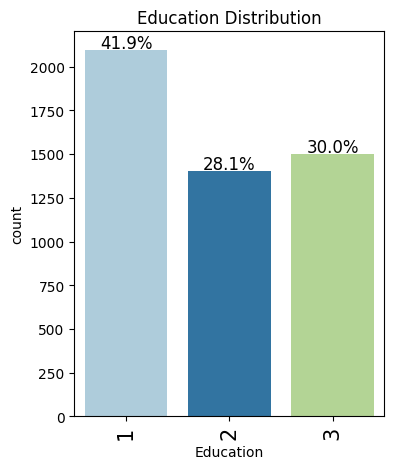

In [21]:
util.labeled_barplot(data = df, feature = "Education", perc = True, title = "Education Distribution")

- The plot suggests that there are more undergraduate customers in the dataset

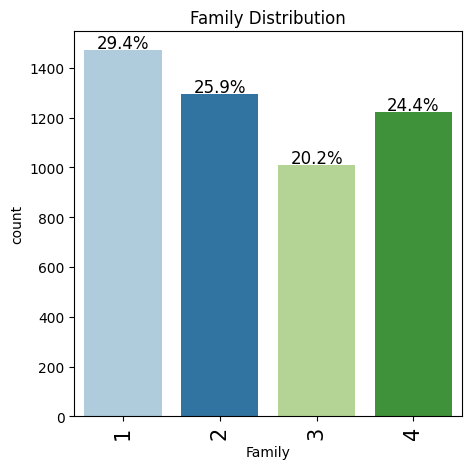

In [22]:
util.labeled_barplot(data = df, feature = "Family", perc = True, title = "Family Distribution")

- The plot suggests that there are more customers with family size of 1

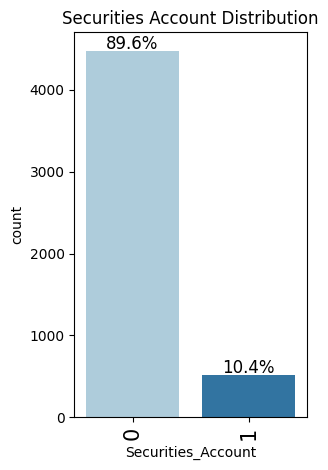

In [23]:
util.labeled_barplot(data = df, feature = "Securities_Account", perc = True, title = "Securities Account Distribution")

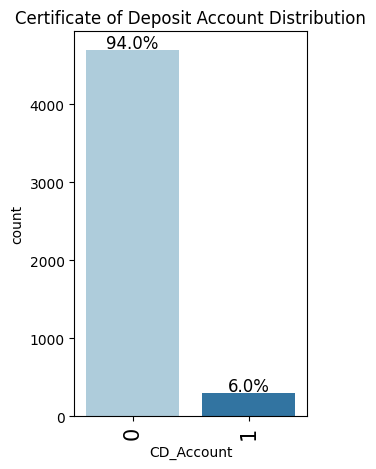

In [24]:
util.labeled_barplot(data = df, feature = "CD_Account", perc = True, title = "Certificate of Deposit Account Distribution")

- The plot suggests that the majority of customers do not have Certificate of Deposit Account

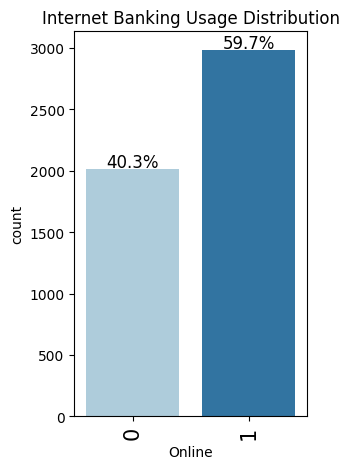

In [25]:
util.labeled_barplot(data = df, feature = "Online", perc = True, title = "Internet Banking Usage Distribution")

- The plot suggests that a larger percentage of the customer base use internet banking facilities

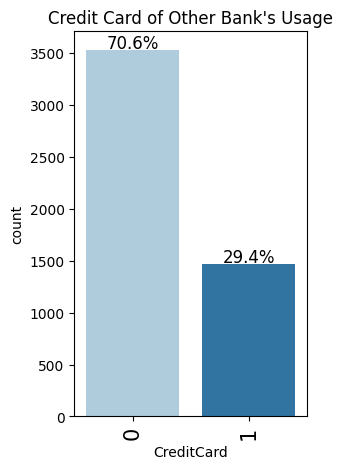

In [26]:
util.labeled_barplot(data = df, feature = "CreditCard", perc = True, 
                     title = "Credit Card of Other Bank's Usage")

- The plot suggests that a larger percentage of the customer base does not use a credit card issued by any other Bank

## Bivariate Analysis

In [27]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

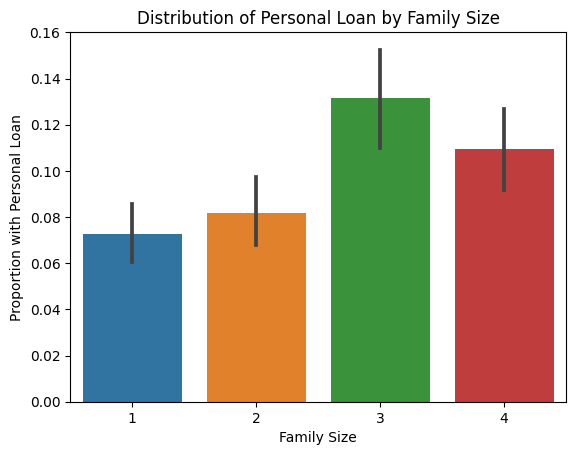

In [29]:
sns.barplot(data = df, x = "Family", y = "Personal_Loan");
plt.xlabel('Family Size')
plt.ylabel('Proportion with Personal Loan')
plt.title('Distribution of Personal Loan by Family Size')
plt.show()

- The plot suggests that there is higher proportion of customers with a family size of 3 who subscribed to the personal loan.

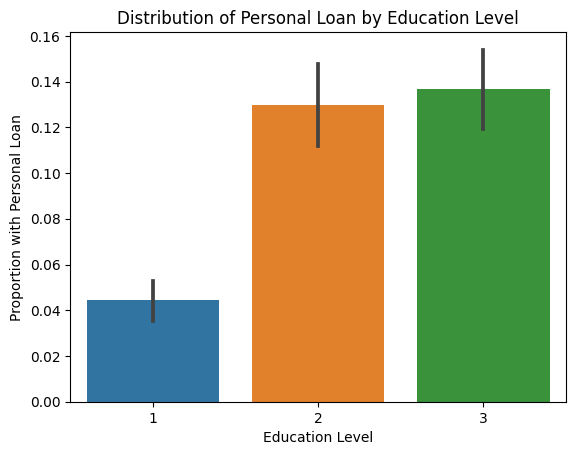

In [30]:
sns.barplot(data = df, x = "Education", y = "Personal_Loan");
plt.xlabel('Education Level')
plt.ylabel('Proportion with Personal Loan')
plt.title('Distribution of Personal Loan by Education Level')
plt.show()

- The plot suggests that there is a higher proportion of advanced/professional customers who subscribed to the personal loan. 

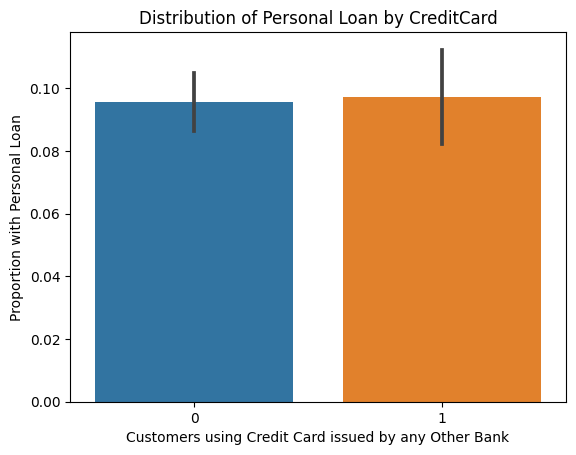

In [31]:
sns.barplot(data = df, x = "CreditCard", y = "Personal_Loan");
plt.xlabel('Customers using Credit Card issued by any Other Bank')
plt.ylabel('Proportion with Personal Loan')
plt.title('Distribution of Personal Loan by CreditCard')
plt.show()

- The plot suggests that there is a slightly higher proportion of Customers using Credit Card issued by any Other Bank who subcribed to the personal loan.

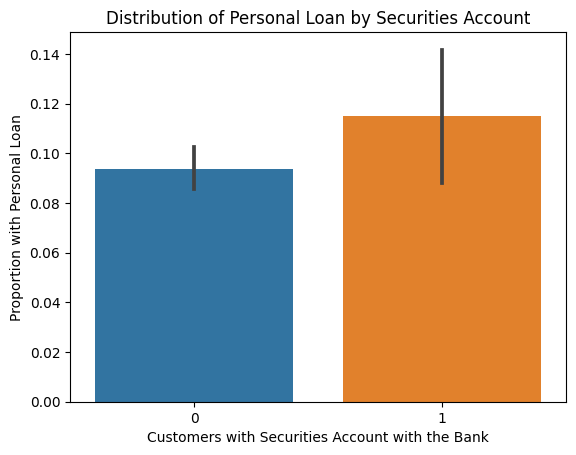

In [32]:
sns.barplot(data = df, x = "Securities_Account", y = "Personal_Loan");
plt.xlabel('Customers with Securities Account with the Bank')
plt.ylabel('Proportion with Personal Loan')
plt.title('Distribution of Personal Loan by Securities Account')
plt.show()

- The plot suggests that there is a higher proportion of Customers with Securities Account with the Bank who subcribed to the personal loan.

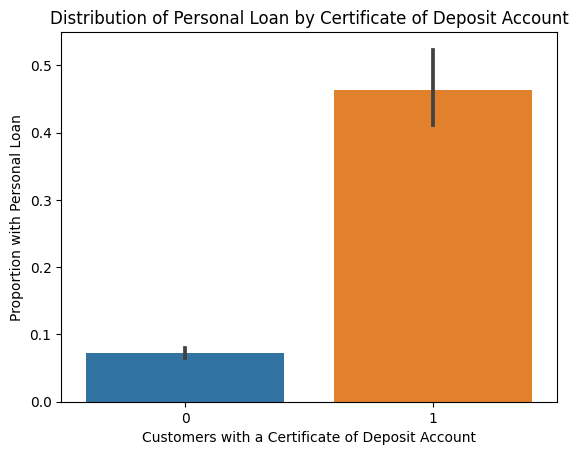

In [33]:
sns.barplot(data = df, x = "CD_Account", y = "Personal_Loan");
plt.xlabel('Customers with a Certificate of Deposit Account')
plt.ylabel('Proportion with Personal Loan')
plt.title('Distribution of Personal Loan by Certificate of Deposit Account')
plt.show()

- The plot suggests that there is a higher proportion of customers with a certificate of deposit account who subscribed to the personal loan.

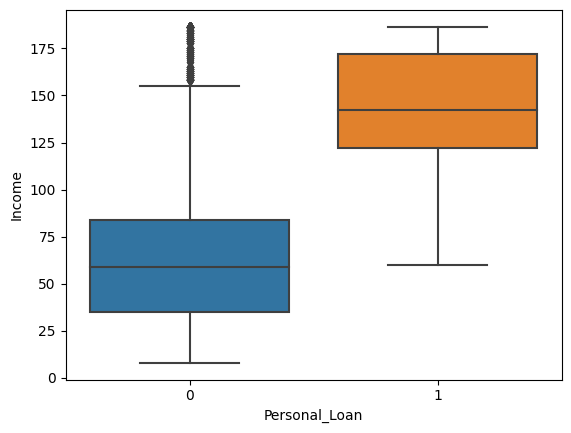

In [34]:
sns.boxplot(data = df, x = "Personal_Loan", y = "Income");
# plt.xlabel('Customers with Securities Account with the Bank')
# plt.ylabel('Proportion with Personal Loan')
# plt.title('Distribution of Personal Loan by Securities Account')
# plt.show()

- The plot suggests that customers with higher income subscribed to the personal loan

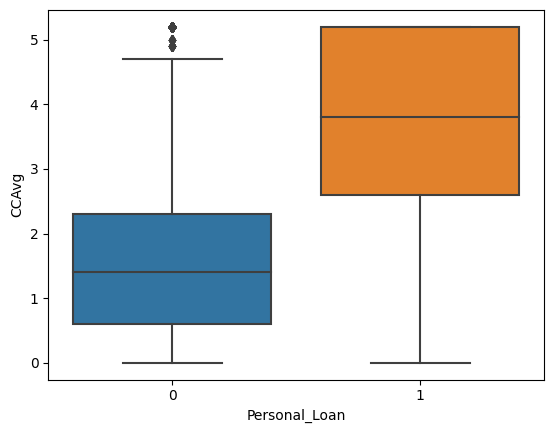

In [35]:
sns.boxplot(data = df, x = "Personal_Loan", y = "CCAvg");

- The plot suggests that customers with higher average spending on credit cards per month (in thousand dollars) subscribed to the personal

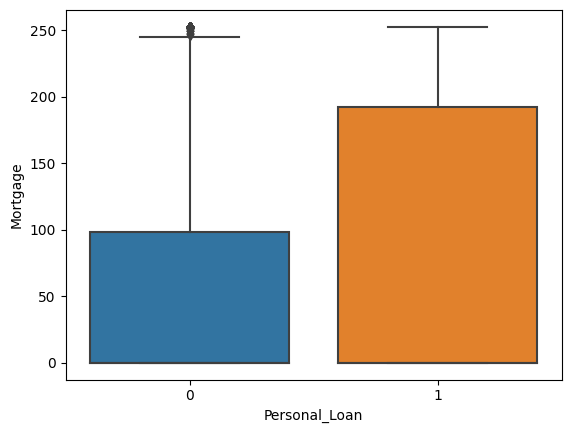

In [36]:
sns.boxplot(data = df, x = "Personal_Loan", y = "Mortgage");

- The plot suggests that customers with the higher value of house mortgage (in thousand dollars) subscribed to the personal loan

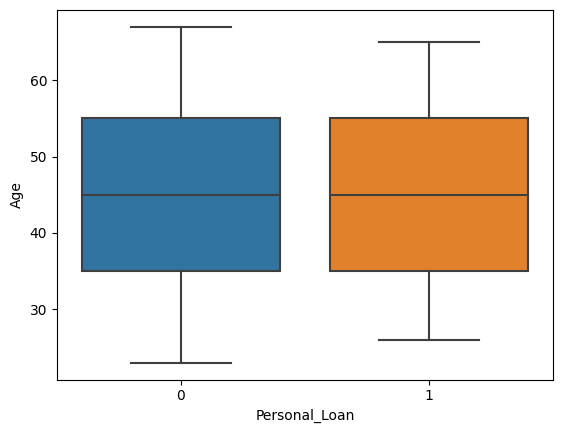

In [37]:
sns.boxplot(data = df, x = "Personal_Loan", y = "Age");

- The plot suggests that the average age of customers that subscribed or did not subscribe to the personal loan is 45.

## Logistic Regression

### Splitting the dataset

In [38]:
X = df.drop("Personal_Loan", axis = 1)
y = df["Personal_Loan"]

In [39]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [40]:
# Checking the value counts of the y_train
y_train.value_counts(normalize = True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

- This simply shows that there is an imbalance in the data. Hence, normalization using Standard Scaler will be applied to the data before building the model.

In [41]:
# Normalising the Data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Building the model
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [43]:
# Making predictions on the train split set
y_pred_train = log_reg.predict(X_train_scaled)

### Classification Report

In [44]:
# Model Performance Assessment for the train split set
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

class_report_train = pd.DataFrame(
        {
            "Accuracy": accuracy_train,
            "Recall": recall_train,
            "Precision": precision_train,
            "F1-score": f1_train
        }, 
        index=[0])

class_report_train

,Accuracy,Recall,Precision,F1-score
0,0.95775,0.671875,0.857143,0.753285


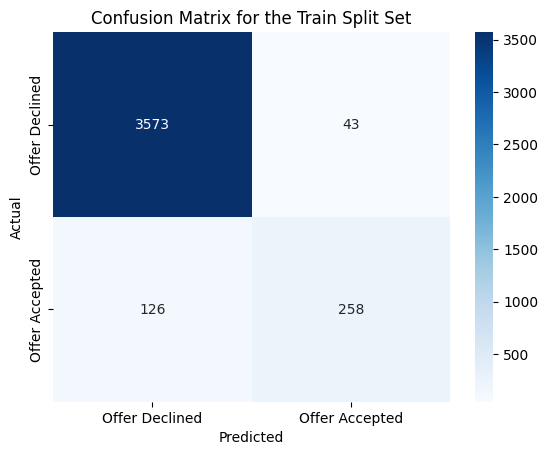

In [45]:
# Confusion Matrix for the train split set
cm = confusion_matrix(y_train, y_pred_train)
labels = ["Offer Declined", "Offer Accepted"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Train Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- The model achieves an accuracy of approximately 95.78% on the training data, indicating a reasonably high level of correct predictions. The recall score of approximately 67.19% suggests that the model is capturing only about two-thirds of the positive instances in the training set. The precision score of approximately 85.71% indicates that when the model predicts a positive instance, it is correct around 85.71% of the time. The F1-score of approximately 75.33% is a harmonic mean of precision and recall, suggesting a moderate balance between the two metrics.

In [46]:
# Make predictions on the test split set
y_pred = log_reg.predict(X_test_scaled)

In [47]:
# Model Performance Assessment for the test split set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


class_report = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        }, 
        index=[0])

class_report

,Accuracy,Recall,Precision,F1-score
0,0.95,0.59375,0.838235,0.695122


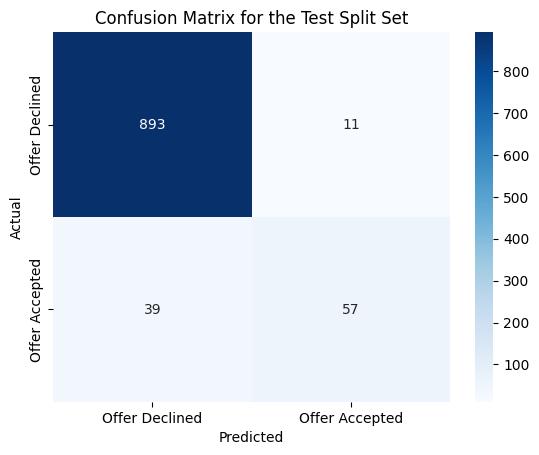

In [48]:
# Confusion Matrix for the test split set
cm = confusion_matrix(y_test, y_pred)
labels = ["Offer Declined", "Offer Accepted"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Test Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- The noticeable drop in performance metrics from the training to the test split, especially in recall, suggests that the model may be overfitting to some patterns specific to the training data. It is struggling to generalize well to new, unseen data, as evidenced by the lower recall and F1-score on the test split. To address potential overfitting, we will consider techniques such as adjusting hyperparameters, increasing the size of the training data, or exploring more sophisticated modeling approaches.

## Model Improvement

### Hyperparameter Tuning

In [49]:
# Building the model
log_reg2 = LogisticRegression(random_state = 0, C = 1.0, penalty = 'l1', solver = 'liblinear')
log_reg2.fit(X_train_scaled, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [50]:
# Making predictions on the train split set
y_pred_train2 = log_reg2.predict(X_train_scaled)

In [51]:
# Model Performance Assessment for the train split set
accuracy_train = accuracy_score(y_train, y_pred_train2)
precision_train = precision_score(y_train, y_pred_train2)
recall_train = recall_score(y_train, y_pred_train2)
f1_train = f1_score(y_train, y_pred_train2)

class_report_train2 = pd.DataFrame(
        {
            "Accuracy": accuracy_train,
            "Recall": recall_train,
            "Precision": precision_train,
            "F1-score": f1_train
        }, 
        index=[0])

class_report_train2

,Accuracy,Recall,Precision,F1-score
0,0.9575,0.669271,0.856667,0.751462


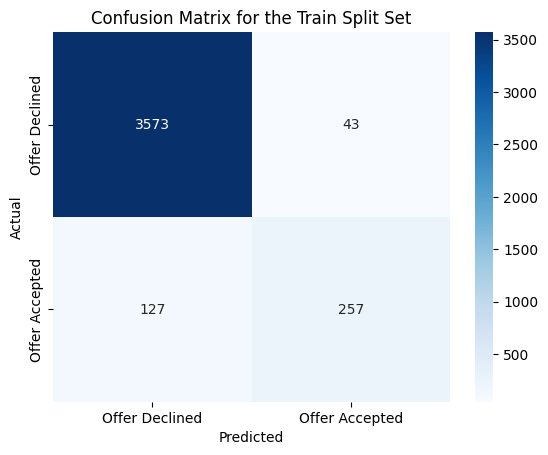

In [52]:
# Confusion Matrix for the train split set
cm = confusion_matrix(y_train, y_pred_train2)
labels = ["Offer Declined", "Offer Accepted"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Train Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- The model achieves an accuracy of approximately 95.75% on the training data, indicating a reasonably high level of correct predictions. The recall score of approximately 66.93% suggests that the model is capturing about two-thirds of the positive instances in the training set. The precision score of approximately 85.67% indicates that when the model predicts a positive instance, it is correct around 85.67% of the time. The F1-score of approximately 75.15% represents a moderate balance between precision and recall.

In [53]:
# Make predictions on the test split set
y_pred2 = log_reg2.predict(X_test_scaled)

In [54]:
# Model Performance Assessment for the test split set
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)


class_report2 = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        }, 
        index=[0])

class_report2

,Accuracy,Recall,Precision,F1-score
0,0.951,0.59375,0.850746,0.699387


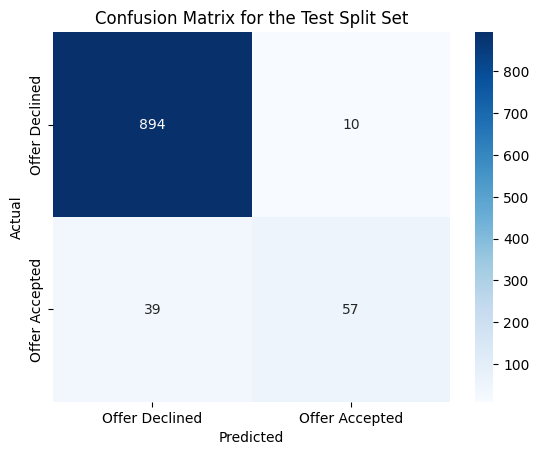

In [55]:
# Confusion Matrix for the test split set
cm = confusion_matrix(y_test, y_pred2)
labels = ["Offer Declined", "Offer Accepted"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Test Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- The drop in performance metrics from the training to the test split, particularly in recall, suggests that the model may be overfitting to some patterns specific to the training data. It is struggling to generalize well to new, unseen data, as evidenced by the lower recall and F1-score on the test split.

## Data Balancing

### Applying SMOTE

In [56]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [57]:
# Instantiating SMOTE
smote = SMOTE()

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_train, y_train = X_resampled, y_resampled

In [58]:
y_train.value_counts()

0    3616
1    3616
Name: Personal_Loan, dtype: int64

In [59]:
# Normalising the Data
scaler = StandardScaler()

X_train_scaled2 = scaler.fit_transform(X_train)
X_test_scaled2 = scaler.transform(X_test)

In [60]:
# Building the model
log_reg3 = LogisticRegression(random_state = 0)
log_reg3.fit(X_train_scaled2, y_train)

LogisticRegression(random_state=0)

In [61]:
# Making predictions on the train split set
y_pred_train3 = log_reg3.predict(X_train_scaled2)

In [62]:
# Model Performance Assessment for the train split set
accuracy_train = accuracy_score(y_train, y_pred_train3)
precision_train = precision_score(y_train, y_pred_train3)
recall_train = recall_score(y_train, y_pred_train3)
f1_train = f1_score(y_train, y_pred_train3)

class_report_train3 = pd.DataFrame(
        {
            "Accuracy": accuracy_train,
            "Recall": recall_train,
            "Precision": precision_train,
            "F1-score": f1_train
        }, 
        index=[0])

class_report_train3

,Accuracy,Recall,Precision,F1-score
0,0.908601,0.92229,0.897712,0.909835


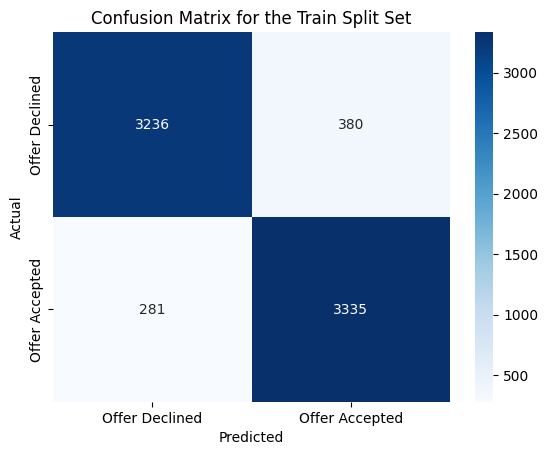

In [63]:
# Confusion Matrix for the train split set
cm = confusion_matrix(y_train, y_pred_train3)
labels = ["Offer Declined", "Offer Accepted"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Train Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [64]:
# Make predictions on the test split set
y_pred3 = log_reg3.predict(X_test_scaled2)

In [65]:
# Model Performance Assessment for the test split set
accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)


class_report3 = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        }, 
        index=[0])

class_report3

,Accuracy,Recall,Precision,F1-score
0,0.886,0.854167,0.450549,0.589928


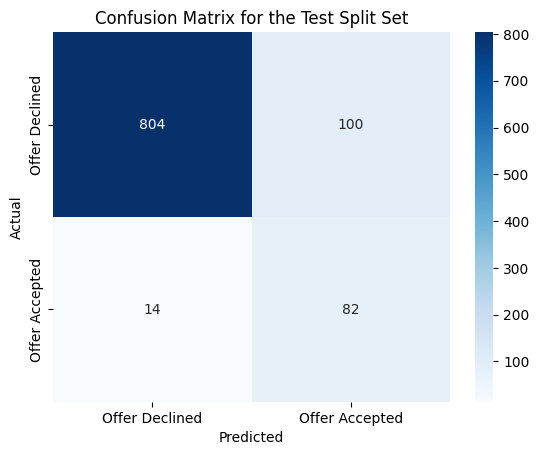

In [66]:
# Confusion Matrix for the test split set
cm = confusion_matrix(y_test, y_pred3)
labels = ["Offer Declined", "Offer Accepted"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Test Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- The model may be overfitting as there is a noticeable drop in performance metrics from the training to the test split, especially in recall, precision, and F1-score. It suggests that the model is struggling to generalize well to new, unseen data.

## Tree Based Feature Selection

In [67]:
X.shape

(5000, 13)

In [68]:
X.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard'],
      dtype='object')

In [69]:
clf = ExtraTreesClassifier(n_estimators=50)

In [70]:
clf = clf.fit(X, y)

In [71]:
clf.feature_importances_

array([0.03316113, 0.03881601, 0.03843495, 0.26445864, 0.03706346,
       0.09822666, 0.17392166, 0.17636351, 0.02660534, 0.00976132,
       0.07111823, 0.01424554, 0.01782355])

In [72]:
model = SelectFromModel(clf, prefit=True)

In [73]:
X_new = model.transform(X)

C:\Users\SPESSE ENVIROMENT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [74]:
X_new.shape

(5000, 4)

In [75]:
X_new

array([[49. ,  4. ,  1.6,  1. ],
       [34. ,  3. ,  1.5,  1. ],
       [11. ,  1. ,  1. ,  1. ],
       ...,
       [24. ,  2. ,  0.3,  3. ],
       [49. ,  3. ,  0.5,  2. ],
       [83. ,  3. ,  0.8,  1. ]])

In [76]:
# Identifying the selected features
original_features = ['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
                     'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online',
                     'CreditCard']

feature_importance = np.array([0.0328823, 0.03694125, 0.03704365, 0.29936488, 0.03435638,
                               0.09207949, 0.15260669, 0.17548417, 0.02545185, 0.00959969,
                               0.07183826, 0.01380181, 0.01854957])

# Sort the feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]

# Select the top features based on importance
top_features = sorted_indices[:len(X_new[0])]

# Map the indices to feature labels
selected_labels = [original_features[idx] for idx in top_features]

print(selected_labels)

['Income', 'Education', 'CCAvg', 'Family']


- The four features listed in the result above will now be used to rebuild a model for improvement.

In [77]:
# Instantiating SMOTE
smote = SMOTE()

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X_new, y)

In [78]:
y_resampled.value_counts()

0    4520
1    4520
Name: Personal_Loan, dtype: int64

### Rebuilding the Model

In [79]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify = y_resampled)

In [80]:
# Checking the value counts of the y_train
y_train.value_counts(normalize = True)

0    0.5
1    0.5
Name: Personal_Loan, dtype: float64

In [81]:
# Normalising the Data
scaler = StandardScaler()

X_train_scaled3 = scaler.fit_transform(X_train)
X_test_scaled3 = scaler.transform(X_test)

In [82]:
# Building the model
log_reg4 = LogisticRegression(random_state = 0, C = 1.0, penalty = 'l1', solver = 'liblinear')
log_reg4.fit(X_train_scaled3, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [83]:
# Making predictions on the train split set
y_pred_train4 = log_reg4.predict(X_train_scaled3)

In [84]:
# Model Performance Assessment for the train split set
accuracy_train = accuracy_score(y_train, y_pred_train4)
precision_train = precision_score(y_train, y_pred_train4)
recall_train = recall_score(y_train, y_pred_train4)
f1_train = f1_score(y_train, y_pred_train4)

class_report_train4 = pd.DataFrame(
        {
            "Accuracy": accuracy_train,
            "Recall": recall_train,
            "Precision": precision_train,
            "F1-score": f1_train
        }, 
        index=[0])

class_report_train4

,Accuracy,Recall,Precision,F1-score
0,0.894082,0.899336,0.889984,0.894635


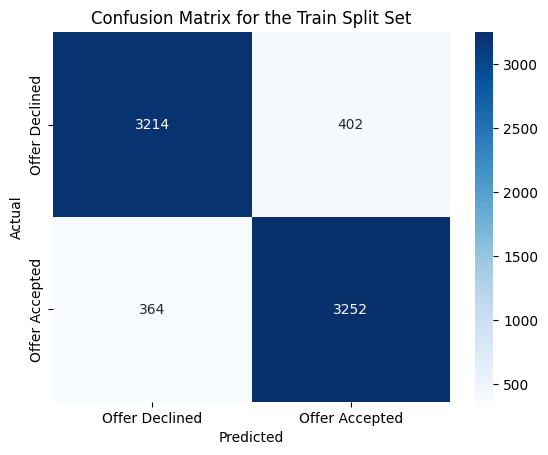

In [85]:
# Confusion Matrix for the train split set
cm = confusion_matrix(y_train, y_pred_train4)
labels = ["Offer Declined", "Offer Accepted"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Train Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [86]:
# Making predictions on the train split set
y_pred4 = log_reg4.predict(X_test_scaled3)

In [87]:
# Model Performance Assessment for the test split set
accuracy = accuracy_score(y_test, y_pred4)
precision = precision_score(y_test, y_pred4)
recall = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)


class_report4 = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        }, 
        index=[0])

class_report4

,Accuracy,Recall,Precision,F1-score
0,0.884403,0.886062,0.883131,0.884594


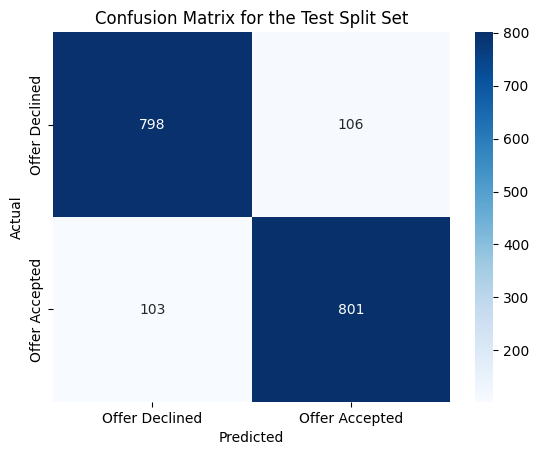

In [88]:
# Confusion Matrix for the test split set
cm = confusion_matrix(y_test, y_pred4)
labels = ["Offer Declined", "Offer Accepted"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Test Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- The model is generalizing well as there is consistency in performance metrics between the training and test splits, indicating that the model is able to capture the underlying patterns in the data and make accurate predictions on new, unseen instances.

## Decision Tree Model
Since the last model is the best for now, we will build Decision Tree Model using it's balanced and scaled data

In [89]:
# Building the model using default hyperparameters
dec_tree = DecisionTreeClassifier(random_state = 0)
dec_tree.fit(X_train_scaled3, y_train)

DecisionTreeClassifier(random_state=0)

In [90]:
# Making predictions on the train split set
y_pred_train = dec_tree.predict(X_train_scaled3)

In [91]:
# Model Performance Assessment for the train split set
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

class_report_train = pd.DataFrame(
        {
            "Accuracy": accuracy_train,
            "Recall": recall_train,
            "Precision": precision_train,
            "F1-score": f1_train
        }, 
        index=[0])

class_report_train

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


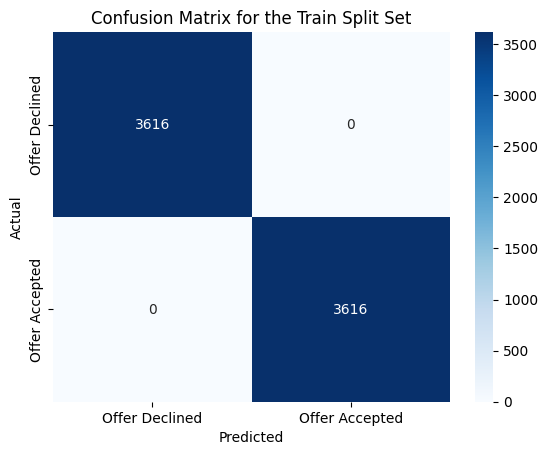

In [92]:
# Confusion Matrix for the train split set
cm = confusion_matrix(y_train, y_pred_train)
labels = ["Offer Declined", "Offer Accepted"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Train Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [93]:
# Making predictions on the test split set
y_pred = dec_tree.predict(X_test_scaled3)

In [94]:
# Model Performance Assessment for the test split set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


class_report = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        }, 
        index=[0])

class_report

,Accuracy,Recall,Precision,F1-score
0,0.99281,0.988938,0.996656,0.992782


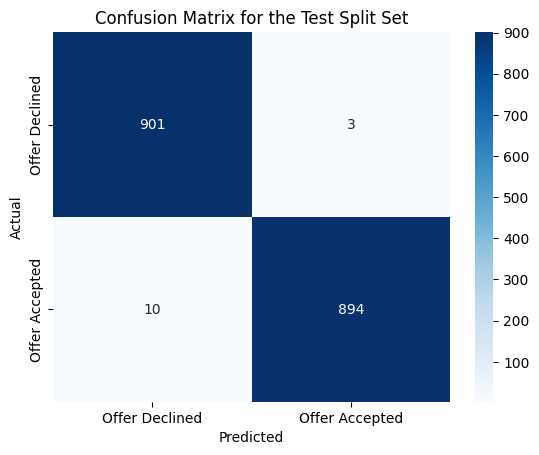

In [95]:
# Confusion Matrix for the test split set
cm = confusion_matrix(y_test, y_pred)
labels = ["Offer Declined", "Offer Accepted"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Test Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- The model is generalizing well as it achieves high performance on both the training and test splits. The perfect scores on the training split indicate that the model has learned the training data extremely well. The high scores on the test split suggest that the model is able to generalize its learning to new, unseen data, demonstrating its effectiveness in making accurate predictions.

## Decision Tree Model with Hyperparmeter Tuning

In [96]:
# Building the model using default hyperparameters
dec_tree2 = DecisionTreeClassifier(random_state = 0, max_depth=3)
dec_tree2.fit(X_train_scaled3, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [97]:
# Making predictions on the train split set
y_pred_train2 = dec_tree2.predict(X_train_scaled3)

In [98]:
# Model Performance Assessment for the train split set
accuracy_train = accuracy_score(y_train, y_pred_train2)
precision_train = precision_score(y_train, y_pred_train2)
recall_train = recall_score(y_train, y_pred_train2)
f1_train = f1_score(y_train, y_pred_train2)

class_report_train2 = pd.DataFrame(
        {
            "Accuracy": accuracy_train,
            "Recall": recall_train,
            "Precision": precision_train,
            "F1-score": f1_train
        }, 
        index=[0])

class_report_train2

,Accuracy,Recall,Precision,F1-score
0,0.967091,0.9776,0.957476,0.967433


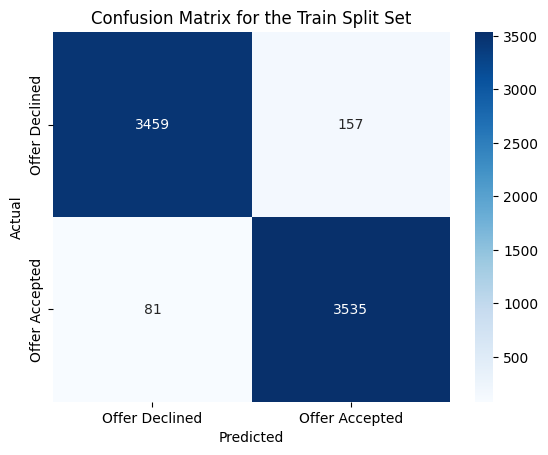

In [99]:
# Confusion Matrix for the train split set
cm = confusion_matrix(y_train, y_pred_train2)
labels = ["Offer Declined", "Offer Accepted"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Train Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [100]:
# Making predictions on the test split set
y_pred2 = dec_tree2.predict(X_test_scaled3)

In [101]:
# Model Performance Assessment for the test split set
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)


class_report2 = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        }, 
        index=[0])

class_report2

,Accuracy,Recall,Precision,F1-score
0,0.96073,0.974558,0.948332,0.961266


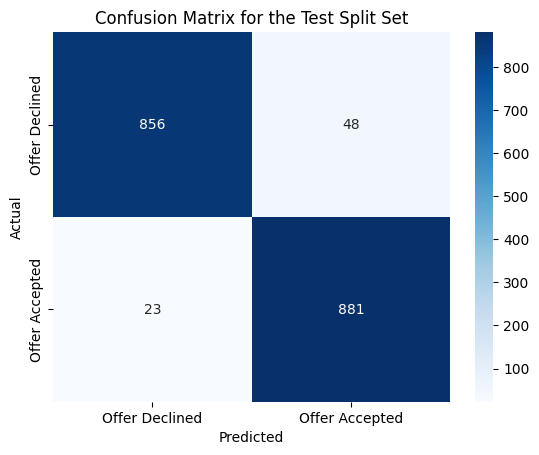

In [102]:
# Confusion Matrix for the test split set
cm = confusion_matrix(y_test, y_pred2)
labels = ["Offer Declined", "Offer Accepted"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Test Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- The model is generalizing well as there is consistency in performance metrics between the training and test splits. The model achieves high accuracy, recall, precision, and F1-score on both sets, indicating its ability to capture patterns in the data and make accurate predictions on unseen instances. The slight drop in performance on the test split compared to the training split is expected, but overall, the model demonstrates good generalization capabilities.

## Gradient Boosting Model

In [103]:
# Building the model using default hyperparameters
gb = GradientBoostingClassifier(random_state = 0)
gb.fit(X_train_scaled3, y_train)

GradientBoostingClassifier(random_state=0)

In [104]:
# Making predictions on the train split set
y_pred_train = gb.predict(X_train_scaled3)

In [105]:
# Model Performance Assessment for the train split set
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

class_report_train = pd.DataFrame(
        {
            "Accuracy": accuracy_train,
            "Recall": recall_train,
            "Precision": precision_train,
            "F1-score": f1_train
        }, 
        index=[0])

class_report_train

,Accuracy,Recall,Precision,F1-score
0,0.993501,0.995299,0.991733,0.993513


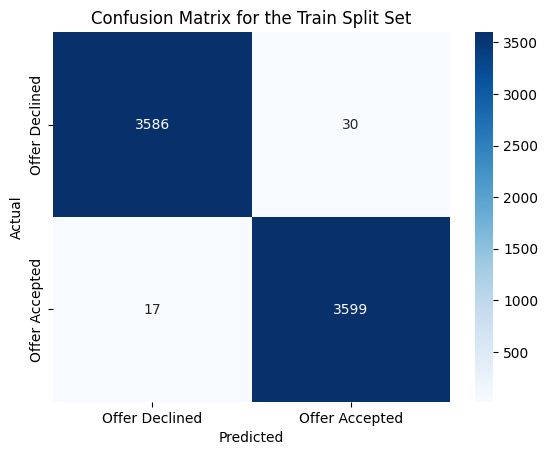

In [106]:
# Confusion Matrix for the train split set
cm = confusion_matrix(y_train, y_pred_train)
labels = ["Offer Declined", "Offer Accepted"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Train Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- The model achieves high accuracy (approximately 99.35%), recall (approximately 99.53%), precision (approximately 99.17%), and F1-score (approximately 99.35%) on the training data. These scores indicate that the model performs well on the training set and is able to capture the patterns present in the data.

In [107]:
# Making predictions on the test split set
y_pred = gb.predict(X_test_scaled3)

In [108]:
# Model Performance Assessment for the test split set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


class_report = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        }, 
        index=[0])

class_report

,Accuracy,Recall,Precision,F1-score
0,0.990597,0.99115,0.990055,0.990603


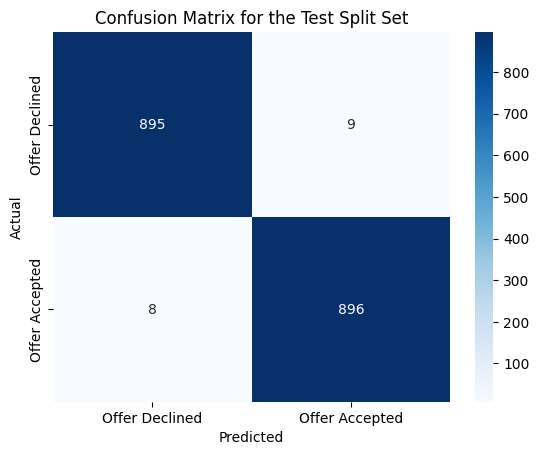

In [109]:
# Confusion Matrix for the test split set
cm = confusion_matrix(y_test, y_pred)
labels = ["Offer Declined", "Offer Accepted"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Test Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- The model performs well on the test data with high accuracy (approximately 99.06%), recall (approximately 99.12%), precision (approximately 99.01%), and F1-score (approximately 99.06%). These scores are comparable to the performance on the training data, indicating that the model is generalizing well to unseen data.

## Gradient Boosting Model with Hyperparameter Tuning
The balanced and scaled data will also be used for this hyperparameter tuning

In [110]:
# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled3, y_train)

# Get the best hyperparameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train a new Gradient Boosting classifier with the best hyperparameters
best_gb_classifier = GradientBoostingClassifier(**best_params)
best_gb_classifier.fit(X_train_scaled3, y_train)

# Evaluate the performance on the test set
accuracy = best_gb_classifier.score(X_test_scaled3, y_test)

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Best Hyperparameters: {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 100}
Best Score: 0.9952990926044347


In [115]:
# Making predictions on the train split set
y_pred_train2 = best_gb_classifier.predict(X_train_scaled3)

In [116]:
# Model Performance Assessment for the train split set
accuracy_train = accuracy_score(y_train, y_pred_train2)
precision_train = precision_score(y_train, y_pred_train2)
recall_train = recall_score(y_train, y_pred_train2)
f1_train = f1_score(y_train, y_pred_train2)

class_report_train2 = pd.DataFrame(
        {
            "Accuracy": accuracy_train,
            "Recall": recall_train,
            "Precision": precision_train,
            "F1-score": f1_train
        }, 
        index=[0])

class_report_train2

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


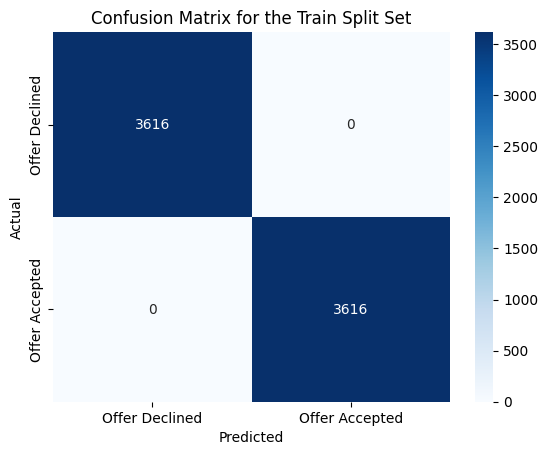

In [120]:
# Confusion Matrix for the train split set
cm = confusion_matrix(y_train, y_pred_train2)
labels = ["Offer Declined", "Offer Accepted"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Train Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- The model achieves perfect accuracy, recall, precision, and F1-score of 100% on the training data. This could indicate that the model has learned the training data extremely well and can accurately classify all instances. However, it's important to note that achieving perfect scores on the training set does not necessarily mean overfitting. It could simply suggest that the training set is relatively easy to learn and the model can capture the underlying patterns accurately.

In [118]:
# Making predictions on the test split set
y_pred2 = best_gb_classifier.predict(X_test_scaled3)

In [119]:
# Model Performance Assessment for the test split set
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)


class_report2 = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        }, 
        index=[0])

class_report2

,Accuracy,Recall,Precision,F1-score
0,0.993363,0.990044,0.996659,0.993341


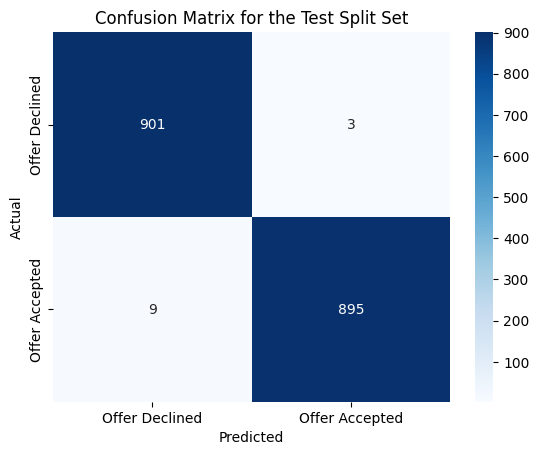

In [121]:
# Confusion Matrix for the test split set
cm = confusion_matrix(y_test, y_pred2)
labels = ["Offer Declined", "Offer Accepted"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Test Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- The model performs very well on the test data with high accuracy (approximately 99.34%), recall (approximately 99.00%), precision (approximately 99.67%), and F1-score (approximately 99.33%). These scores are close to the perfect scores achieved on the training data, indicating that the model is generalizing well to unseen data.

## Random Forest Model

In [122]:
# Building the model using default hyperparameters
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train_scaled3, y_train)

RandomForestClassifier(random_state=0)

In [123]:
# Making predictions on the train split set
y_pred_train = rf.predict(X_train_scaled3)

In [124]:
# Model Performance Assessment for the train split set
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

class_report_train = pd.DataFrame(
        {
            "Accuracy": accuracy_train,
            "Recall": recall_train,
            "Precision": precision_train,
            "F1-score": f1_train
        }, 
        index=[0])

class_report_train

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


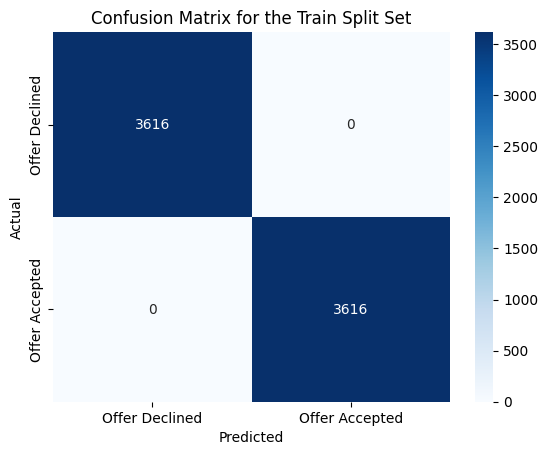

In [125]:
# Confusion Matrix for the train split set
cm = confusion_matrix(y_train, y_pred_train)
labels = ["Offer Declined", "Offer Accepted"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Train Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [126]:
# Making predictions on the test split set
y_pred = rf.predict(X_test_scaled3)

In [127]:
# Model Performance Assessment for the test split set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


class_report = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        }, 
        index=[0])

class_report

,Accuracy,Recall,Precision,F1-score
0,0.993916,0.993363,0.994463,0.993913


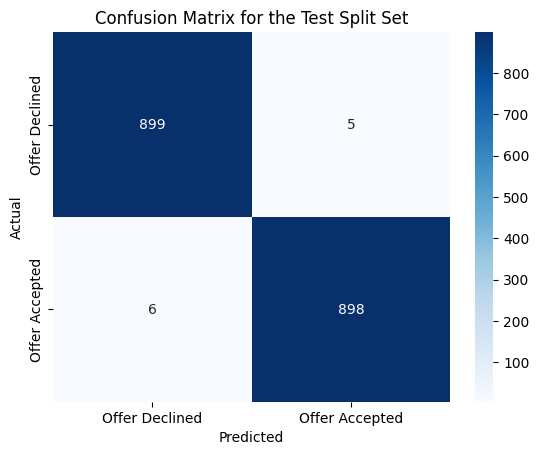

In [128]:
# Confusion Matrix for the test split set
cm = confusion_matrix(y_test, y_pred)
labels = ["Offer Declined", "Offer Accepted"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for the Test Split Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- The model is generalizing well as there is consistency in performance metrics between the training and test splits. The perfect scores on the training split indicate that the model has learned the training data perfectly. The high scores on the test split suggest that the model is able to generalize its learning to new, unseen data, demonstrating its effectiveness in making accurate predictions. Overall, the model shows strong performance on both the training and test data, indicating good generalization capabilities.

## Random Forest Model with Hyperparameter Tuning
The balanced and scaled data will also be used for this hyperparameter tuning

In [131]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled3, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled3)
accuracy = accuracy_score(y_test, y_pred)

# Print the best hyperparameters and the accuracy of the best model
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## Recommendation

Overall, Decision Tree based Models performed better than the Logistic Regression Models. Based on the feature importance analysis carried out, Income', 'Education', 'CCAvg', and 'Family' features will be good predictors of customers that will subscribe for the personal loan. 

The following segment of customers can be more targeted:
- customers with the higher value of house mortgage
- customers with higher income
- customers with higher average spending on credit cards per month (in thousand dollars)
- customers with average age of 45
- Customers with Securities Account with the Bank
- customers with a certificate of deposit account
- advanced/professional customers